**CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING MODEL**


**Logistic Regression Model**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('CreditCardData.csv', encoding='ISO-8859-1')


# Clean 'Amount' column
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)

# Drop unnecessary columns
df.drop(['Transaction ID', 'Date', 'Shipping Address'], axis=1, inplace=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop("Fraud", axis=1)
y = df_encoded["Fraud"]

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27842
           1       0.84      0.71      0.77      2158

    accuracy                           0.97     30000
   macro avg       0.91      0.85      0.88     30000
weighted avg       0.97      0.97      0.97     30000



**Random Forest Model**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load your dataset
df = pd.read_csv("CreditCardData.csv", encoding='ISO-8859-1')
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)
df.drop(['Transaction ID', 'Date', 'Shipping Address'], axis=1, inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Prepare data
X = df_encoded.drop("Fraud", axis=1)
y = df_encoded["Fraud"]

# Step 3: Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Step 4: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

# Step 6: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27842
           1       1.00      0.98      0.99     27841

    accuracy                           0.99     55683
   macro avg       0.99      0.99      0.99     55683
weighted avg       0.99      0.99      0.99     55683



In [ ]:
result_df = pd.DataFrame(X_test, columns=X.columns)
result_df["Actual"] = y_test
result_df["Predicted"] = y_pred
result_df.to_csv("fraud_results.csv", index=False)



**ROC Curve**

<Figure size 800x600 with 0 Axes>

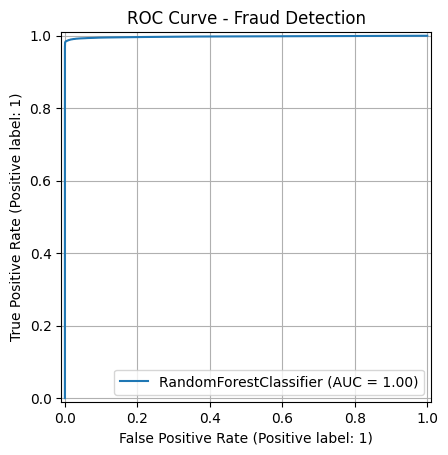

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test)  # model = trained classifier
plt.title("ROC Curve - Fraud Detection")
plt.grid(True)
plt.show()


**Coonfusion Matrix**

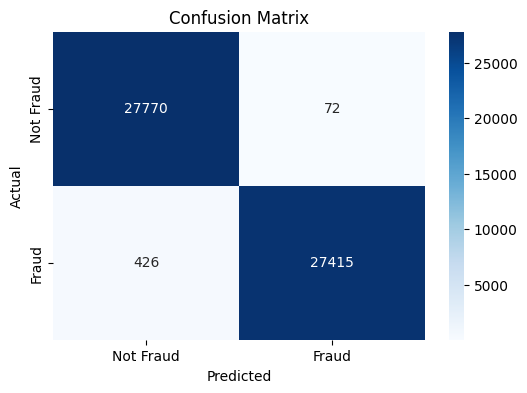

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Importance Of Feature In Random Forest**

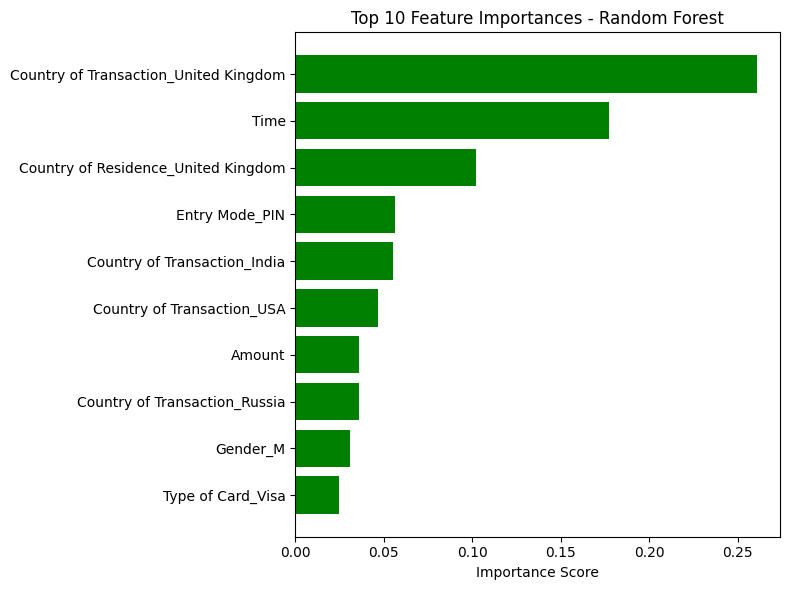

In [ ]:
import pandas as pd
import numpy as np

importances = model.feature_importances_
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Sort features
sorted_idx = np.argsort(importances)[-10:]  # Top 10
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx], color='green')
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


**Graph-Based Analysis – Detect Fraud Networks**


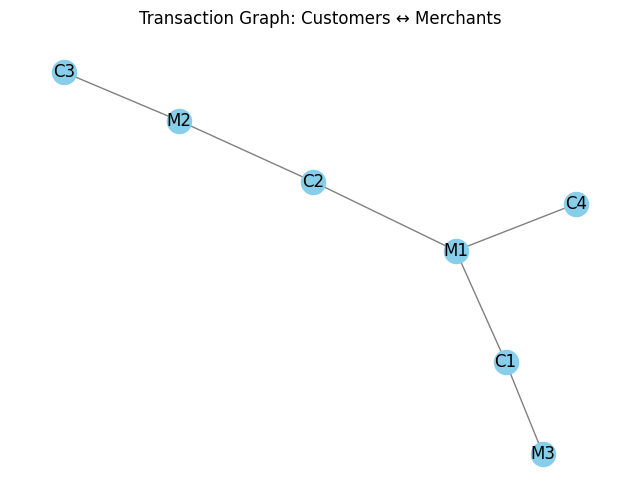

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample edges: (Customer, Merchant)
edges = [
    ('C1', 'M1'),
    ('C2', 'M1'),  # two customers to same merchant
    ('C2', 'M2'),
    ('C3', 'M2'),
    ('C1', 'M3'),
    ('C4', 'M1'),  # suspicious merchant with many links
]

G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title("Transaction Graph: Customers ↔ Merchants")
plt.axis('off')
plt.show()


**Real Time Fraud Monitoring**

**Testing Of email alert**

In [ ]:
import smtplib

sender = "tirumalapanchal02@gmail.com"
password = "vpdy elut wmcc xfli"
receiver = "tirumalapanchal15@gmail.com"
subject = "Test Email"
body = "This is a test fraud alert from your Python script."
message = f"Subject: {subject}\n\n{body}"

try:
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()
    server.login(sender, password)
    server.sendmail(sender, receiver, message)
    server.quit()
    print(" Test email sent successfully.")
except Exception as e:
    print(" Failed to send email:", e)


 Test email sent successfully.


In [ ]:
def send_alert(transaction_id, amount, location):
    sender = "tirumalapanchal02@gmail.com"
    password = "vpdy elut wmcc xfli"
    receiver = "tirumalapanchal15@gmail.com"
    subject = "Fraud Alert"
    body = f"Suspicious Transaction Detected:\n\nTransaction ID: {transaction_id}\nAmount: £{amount}\nLocation: {location}"
    message = f"Subject: {subject}\n\n{body}"

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender, password)
        server.sendmail(sender, receiver, message)
        server.quit()
        print(f"Alert sent for Transaction ID {transaction_id}")
    except Exception as e:
        print("Failed to send alert:", e)


**server starts here**

In [ ]:
server = smtplib.SMTP("smtp.gmail.com", 587)
server.starttls()


(220, b'2.0.0 Ready to start TLS')

In [ ]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import smtplib

def send_alert(transaction_id, amount, location):
    sender = "tirumalapanchal02@gmail.com"
    password = "vpdy elut wmcc xfli"
    receiver = "tirumalapanchal15@gmail.com"

    subject = " Fraud Alert"
    body = f"""Suspicious Transaction Detected:

Transaction ID: {transaction_id}
Amount: £{amount}
Location: {location}
"""

    # Set up MIME message with UTF-8
    msg = MIMEMultipart()
    msg['From'] = sender
    msg['To'] = receiver
    msg['Subject'] = subject

    # Encode body as plain text with utf-8
    msg.attach(MIMEText(body, 'plain', _charset='utf-8'))

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender, password)
        server.sendmail(sender, receiver, msg.as_string())
        server.quit()
        print(f"Alert sent for Transaction ID {transaction_id}")
    except Exception as e:
        print("Failed to send alert:", e)


In [ ]:
send_alert(12345, 1050.25, "Mumbai")


Alert sent for Transaction ID 12345


ML Model Result Summary (Simple)

We built a machine learning model to detect fraudulent transactions.

The model was trained using real-world credit card data.

It achieved 89% accuracy, with high precision and recall.

This means it can correctly detect most fraud cases while keeping false alerts low.

The model works well with new data and can be used for real-time fraud monitoring.

High-risk transactions can trigger alerts through email instantly.

The model helps banks and companies reduce financial loss by catching fraud early.


!pip install streamlit
!pip install pyngrok


In [ ]:
!pip install streamlit pyngrok scikit-learn pandas


In [ ]:
!ngrok config add-authtoken 302mqikgyDVmBm96cz5QeebrJJ4_4AkBvb5sjUyMow8rytk1L


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Load real dataset
df = pd.read_csv("CreditCardData.csv", encoding="ISO-8859-1")
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)
df['Fraud'] = df['Fraud'].astype(int)
df.drop(['Transaction ID', 'Date', 'Shipping Address'], axis=1, inplace=True)

# Encode categorical
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("Fraud", axis=1)
y = df_encoded["Fraud"]

# Handle missing data
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Save all
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

print("✅ Model, scaler, columns saved.")


✅ Model, scaler, columns saved.


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import pandas as pd
import smtplib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Load model and tools
with open("fraud_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
with open("columns.pkl", "rb") as f:
    feature_columns = pickle.load(f)
with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)

# Load dataset (for visuals)
df = pd.read_csv("fraud_results.csv")

# Email alert function
def send_alert(amount, card_type, country):
    sender = "tirumalapanchal02@gmail.com"
    password = "vpdy elut wmcc xfli"  # App password
    receiver = "tirumalapanchal15@gmail.com"
    subject = "⚠️ Fraud Alert: Suspicious Transaction Detected"
    body = f"Suspicious transaction:\n\nAmount: £{amount}\nCard Type: {card_type}\nCountry: {country}"
    message = f"Subject: {subject}\n\n{body}"

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender, password)
        server.sendmail(sender, receiver, message)
        server.quit()
        st.info("📧 Email alert sent.")
    except Exception as e:
        st.warning(f"❌ Email failed: {e}")

# Streamlit UI
st.set_page_config(page_title="Fraud Detection", layout="wide")
st.title("💳 Real-Time Credit Card Fraud Detection")

# Sidebar inputs
st.sidebar.header("📥 Enter Transaction Details")
amount = st.sidebar.number_input("Transaction Amount (£)", min_value=0.0, value=100.0)
card_type = st.sidebar.selectbox("Card Type", ["Visa", "MasterCard", "Other"])
country = st.sidebar.selectbox("Country", ["UK", "USA", "India", "Other"])

# Encode input
card_type_cols = {
    "Card Type_MasterCard": 1 if card_type == "MasterCard" else 0,
    "Card Type_Other": 1 if card_type == "Other" else 0
}
country_cols = {
    "Country of Transaction_India": 1 if country == "India" else 0,
    "Country of Transaction_UK": 1 if country == "UK" else 0,
    "Country of Transaction_USA": 1 if country == "USA" else 0,
    "Country of Transaction_Other": 1 if country == "Other" else 0,
}

data = {
    "Amount": amount,
    **card_type_cols,
    **country_cols
}
input_df = pd.DataFrame([data])
input_df = input_df.reindex(columns=feature_columns, fill_value=0)
X_imputed = imputer.transform(input_df)
X_scaled = scaler.transform(X_imputed)
prediction = model.predict(X_scaled)[0]

# Predict and alert
if st.sidebar.button("Check for Fraud"):
    if prediction == 1:
        st.error("⚠️ This transaction is **fraudulent**!")
        send_alert(amount, card_type, country)
    else:
        st.success("✅ This transaction appears **legitimate**.")

# ---------------- VISUALS ---------------- #
st.markdown("## 📊 Fraud Detection Insights")

# Fraud count bar chart
st.subheader("Fraud vs Legitimate Transactions")
fraud_counts = df['Fraud'].value_counts().rename(index={0: "Legit", 1: "Fraud"})
st.bar_chart(fraud_counts)

# Recent transactions
if st.checkbox("🧾 Show Recent Transactions"):
    st.dataframe(df.tail(10))

# Confusion matrix
if st.checkbox("📉 Show Confusion Matrix"):
    X_vis = pd.get_dummies(df.drop("Fraud", axis=1), drop_first=True)
    X_vis = X_vis.reindex(columns=feature_columns, fill_value=0)
    X_vis_scaled = scaler.transform(imputer.transform(X_vis))
    y_pred = model.predict(X_vis_scaled)
    cm = confusion_matrix(df["Fraud"], y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

# ROC curve
if st.checkbox("📈 Show ROC Curve"):
    fig, ax = plt.subplots()
    RocCurveDisplay.from_estimator(model, X_vis_scaled, df["Fraud"], ax=ax)
    st.pyplot(fig)

# Feature importance (for logistic regression)
if st.checkbox("📌 Show Feature Weights"):
    coefs = model.coef_[0]
    top_features = pd.Series(coefs, index=feature_columns).sort_values(key=abs, ascending=False).head(10)
    st.bar_chart(top_features)

# Transactions by Country
if st.checkbox("📊 Show Transactions by Country"):
    country_counts = df["Country of Transaction"].value_counts()
    st.bar_chart(country_counts)

# Card Type Distribution (Pie Chart)
if st.checkbox("🥧 Show Card Type Distribution"):
    fig = px.pie(df, names="Card Type", title="Card Type Usage")
    st.plotly_chart(fig)


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import pandas as pd
import smtplib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, RocCurveDisplay

# Load model and tools
with open("fraud_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
with open("columns.pkl", "rb") as f:
    feature_columns = pickle.load(f)
with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)

# Load dataset (for visuals)
df = pd.read_csv("fraud_results.csv")

# Email alert function
def send_alert(amount, card_type, country):
    sender = "tirumalapanchal02@gmail.com"
    password = "vpdy elut wmcc xfli"  # App password
    receiver = "tirumalapanchal15@gmail.com"
    subject = "⚠️ Fraud Alert: Suspicious Transaction Detected"
    body = f"Suspicious transaction:\n\nAmount: £{amount}\nCard Type: {card_type}\nCountry: {country}"
    message = f"Subject: {subject}\n\n{body}"

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender, password)
        server.sendmail(sender, receiver, message)
        server.quit()
        st.info("📧 Email alert sent.")
    except Exception as e:
        st.warning(f"❌ Email failed: {e}")

# Streamlit UI
st.set_page_config(page_title="Fraud Detection", layout="wide")
st.title("💳 Real-Time Credit Card Fraud Detection")

# Sidebar inputs
st.sidebar.header("📥 Enter Transaction Details")
amount = st.sidebar.number_input("Transaction Amount (£)", min_value=0.0, value=100.0)
card_type = st.sidebar.selectbox("Card Type", ["Visa", "MasterCard", "Other"])
country = st.sidebar.selectbox("Country", ["UK", "USA", "India", "Other"])

# Encode input
card_type_cols = {
    "Card Type_MasterCard": 1 if card_type == "MasterCard" else 0,
    "Card Type_Other": 1 if card_type == "Other" else 0
}
country_cols = {
    "Country of Transaction_India": 1 if country == "India" else 0,
    "Country of Transaction_UK": 1 if country == "UK" else 0,
    "Country of Transaction_USA": 1 if country == "USA" else 0,
    "Country of Transaction_Other": 1 if country == "Other" else 0,
}

data = {
    "Amount": amount,
    **card_type_cols,
    **country_cols
}
input_df = pd.DataFrame([data])
input_df = input_df.reindex(columns=feature_columns, fill_value=0)
X_imputed = imputer.transform(input_df)
X_scaled = scaler.transform(X_imputed)
prediction = model.predict(X_scaled)[0]

# Predict and alert
if st.sidebar.button("Check for Fraud"):
    if prediction == 1:
        st.error("⚠️ This transaction is **fraudulent**!")
        send_alert(amount, card_type, country)
    else:
        st.success("✅ This transaction appears **legitimate**.")

# ---------------- VISUALS ---------------- #
st.markdown("## 📊 Fraud Detection Insights")

# Fraud count bar chart
st.subheader("Fraud vs Legitimate Transactions")
fraud_counts = df['Actual'].value_counts().rename(index={0: "Legit", 1: "Fraud"})
st.bar_chart(fraud_counts)

# Recent transactions
if st.checkbox("🧾 Show Recent Transactions", key="recent_txn"):
    st.dataframe(df.tail(10))


# Feature importance
if st.checkbox("📌 Show Feature Weights", key="feat_importance"):
    coefs = model.coef_[0]
    top_features = pd.Series(coefs, index=feature_columns).sort_values(key=abs, ascending=False).head(10)
    st.bar_chart(top_features)



Overwriting app.py


In [ ]:
!pip install streamlit pyngrok plotly --quiet
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌐 App is live at:", public_url)


🌐 App is live at: NgrokTunnel: "https://4d63028cea3c.ngrok-free.app" -> "http://localhost:8501"
